# Kees Smit Heatmaps - AZ 25/26

In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(''))))

from scrappers import WhoScored
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

ws = WhoScored(leagues=["NED-Eredivisie"], seasons=["25-26"])
schedule = ws.read_schedule()

schedule_reset = schedule.reset_index()
matches_df = schedule_reset[
    (schedule_reset['home_team'].str.contains('AZ', case=False, na=False)) |
    (schedule_reset['away_team'].str.contains('AZ', case=False, na=False))
].copy()

matches_df = matches_df[['date', 'home_team', 'away_team', 'game_id']].copy()
matches_df = matches_df.rename(columns={'game_id': 'match_id'})

print(f"Total partidos AZ en Eredivisie 25/26: {len(matches_df)}")
matches_df.head()

INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

Total partidos AZ en Eredivisie 25/26: 34


,date,home_team,away_team,match_id
5,2025-08-10 12:30:00+00:00,AZ Alkmaar,FC Groningen,1903740
13,2025-08-17 14:45:00+00:00,FC Volendam,AZ Alkmaar,1903749
31,2025-08-31 14:45:00+00:00,NAC Breda,AZ Alkmaar,1903767
41,2025-09-14 12:30:00+00:00,Heracles,AZ Alkmaar,1903774
49,2025-09-21 14:45:00+00:00,AZ Alkmaar,Feyenoord,1903786


In [2]:
from wrappers import whoscored_get_match_events
import os

# CSV path para guardar/cargar eventos
csv_path = '../data/smit_all_events_eredivisie_2526.csv'

# Intentar cargar desde CSV primero
if os.path.exists(csv_path):
    print(f"Cargando eventos desde CSV: {csv_path}")
    df_all_events = pd.read_csv(csv_path)
    print(f"Cargados: {len(df_all_events)} eventos de Kees Smit")
    print(f"\nTipos de eventos:")
    print(df_all_events['type'].value_counts().head(10))
else:
    # Si no existe, scrapear y guardar
    print("CSV no encontrado, scrapeando eventos...")
    all_smit_events = []

    for idx, match in matches_df.iterrows():
        print(f"\n[{idx+1}/{len(matches_df)}] {match['home_team']} vs {match['away_team']}")
        
        try:
            events = ws.read_events(match_id=int(match['match_id']))
            
            smit_events = events[events['player'].str.contains('Kees Smit', case=False, na=False)].copy()
            
            if len(smit_events) > 0:
                smit_events['match_date'] = match['date']
                smit_events['opponent'] = match['away_team'] if 'AZ' in match['home_team'] else match['home_team']
                smit_events['venue'] = 'Home' if 'AZ' in match['home_team'] else 'Away'
                smit_events['match_id'] = match['match_id']
                all_smit_events.append(smit_events)
                print(f"  {len(smit_events)} acciones de Kees Smit")
            else:
                print(f"  Sin acciones de Kees Smit")
                
        except Exception as e:
            print(f"  Error: {e}")
            continue

    print(f"\nPartidos con acciones de Kees Smit: {len(all_smit_events)}")

    if len(all_smit_events) > 0:
        df_all_events = pd.concat(all_smit_events, ignore_index=True)
        
        # Guardar a CSV
        os.makedirs('../data', exist_ok=True)
        df_all_events.to_csv(csv_path, index=False)
        print(f"\nGuardado en CSV: {csv_path}")
        print(f"Total acciones: {len(df_all_events)}")
        print(f"\nTipos de eventos:")
        print(df_all_events['type'].value_counts().head(10))
    else:
        df_all_events = pd.DataFrame()

CSV no encontrado, scrapeando eventos...

[6/34] AZ Alkmaar vs FC Groningen


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903740

  56 acciones de Kees Smit

[14/34] FC Volendam vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903749

  85 acciones de Kees Smit

[32/34] NAC Breda vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903767

  61 acciones de Kees Smit

[42/34] Heracles vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903774

  65 acciones de Kees Smit

[50/34] AZ Alkmaar vs Feyenoord


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903786

  63 acciones de Kees Smit

[54/34] AZ Alkmaar vs PEC Zwolle


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903754

  94 acciones de Kees Smit

[62/34] NEC Nijmegen vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1904012

  Sin acciones de Kees Smit

[69/34] AZ Alkmaar vs Telstar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1904030

  77 acciones de Kees Smit

[73/34] Ajax vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903999

  68 acciones de Kees Smit

[87/34] AZ Alkmaar vs FC Utrecht


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1904024

  68 acciones de Kees Smit

[99/34] Sparta Rotterdam vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1904036

  77 acciones de Kees Smit

[105/34] AZ Alkmaar vs PSV Eindhoven


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903797

  73 acciones de Kees Smit

[116/34] SC Heerenveen vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903819

WARNING  No events found for game 1903819

  Error: 'player'

[126/34] Twente vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903852

WARNING  No events found for game 1903852

  Error: 'player'

[132/34] AZ Alkmaar vs Go Ahead Eagles


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903858

WARNING  No events found for game 1903858

  Error: 'player'

[140/34] AZ Alkmaar vs Excelsior


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903805

WARNING  No events found for game 1903805

  Error: 'player'

[152/34] Fortuna Sittard vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903851

WARNING  No events found for game 1903851

  Error: 'player'

[155/34] AZ Alkmaar vs FC Volendam


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903857

WARNING  No events found for game 1903857

  Error: 'player'

[167/34] PEC Zwolle vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903808

WARNING  No events found for game 1903808

  Error: 'player'

[180/34] Telstar vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903833

WARNING  No events found for game 1903833

  Error: 'player'

[182/34] AZ Alkmaar vs NEC Nijmegen


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903841

WARNING  No events found for game 1903841

  Error: 'player'

[190/34] AZ Alkmaar vs Ajax


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903869

WARNING  No events found for game 1903869

  Error: 'player'

[200/34] Excelsior vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903918

WARNING  No events found for game 1903918

  Error: 'player'

[208/34] AZ Alkmaar vs Sparta Rotterdam


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903949

WARNING  No events found for game 1903949

  Error: 'player'

[218/34] FC Utrecht vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903899

WARNING  No events found for game 1903899

  Error: 'player'

[233/34] PSV Eindhoven vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903925

WARNING  No events found for game 1903925

  Error: 'player'

[235/34] AZ Alkmaar vs Heracles


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903934

WARNING  No events found for game 1903934

  Error: 'player'

[244/34] FC Groningen vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903956

WARNING  No events found for game 1903956

  Error: 'player'

[253/34] AZ Alkmaar vs Fortuna Sittard


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903974

WARNING  No events found for game 1903974

  Error: 'player'

[262/34] AZ Alkmaar vs SC Heerenveen


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903982

WARNING  No events found for game 1903982

  Error: 'player'

[273/34] Go Ahead Eagles vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903993

WARNING  No events found for game 1903993

  Error: 'player'

[280/34] AZ Alkmaar vs Twente


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903900

WARNING  No events found for game 1903900

  Error: 'player'

[292/34] Feyenoord vs AZ Alkmaar


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903917

WARNING  No events found for game 1903917

  Error: 'player'

[298/34] AZ Alkmaar vs NAC Breda


INFO     Retrieving calendar for NED-Eredivisie 2526

INFO     [1/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [2/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [3/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [4/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [5/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [6/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [7/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [8/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [9/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [10/10] Retrieving fixtures for NED-Eredivisie 2526

INFO     [1/1] Retrieving game with id=1903941

WARNING  No events found for game 1903941

  Error: 'player'

Partidos con acciones de Kees Smit: 11

Guardado en CSV: ../data/smit_all_events_eredivisie_2526.csv
Total acciones: 787

Tipos de eventos:
type
Pass            523
BallRecovery     66
BallTouch        44
Foul             30
TakeOn           26
Dispossessed     16
Tackle           13
SavedShot        10
BlockedPass       8
Challenge         8
Name: count, dtype: int64


Eventos con coordenadas válidas: 787

Guardado: ../images/smit_heatmaps/smit_all_actions_heatmap.png


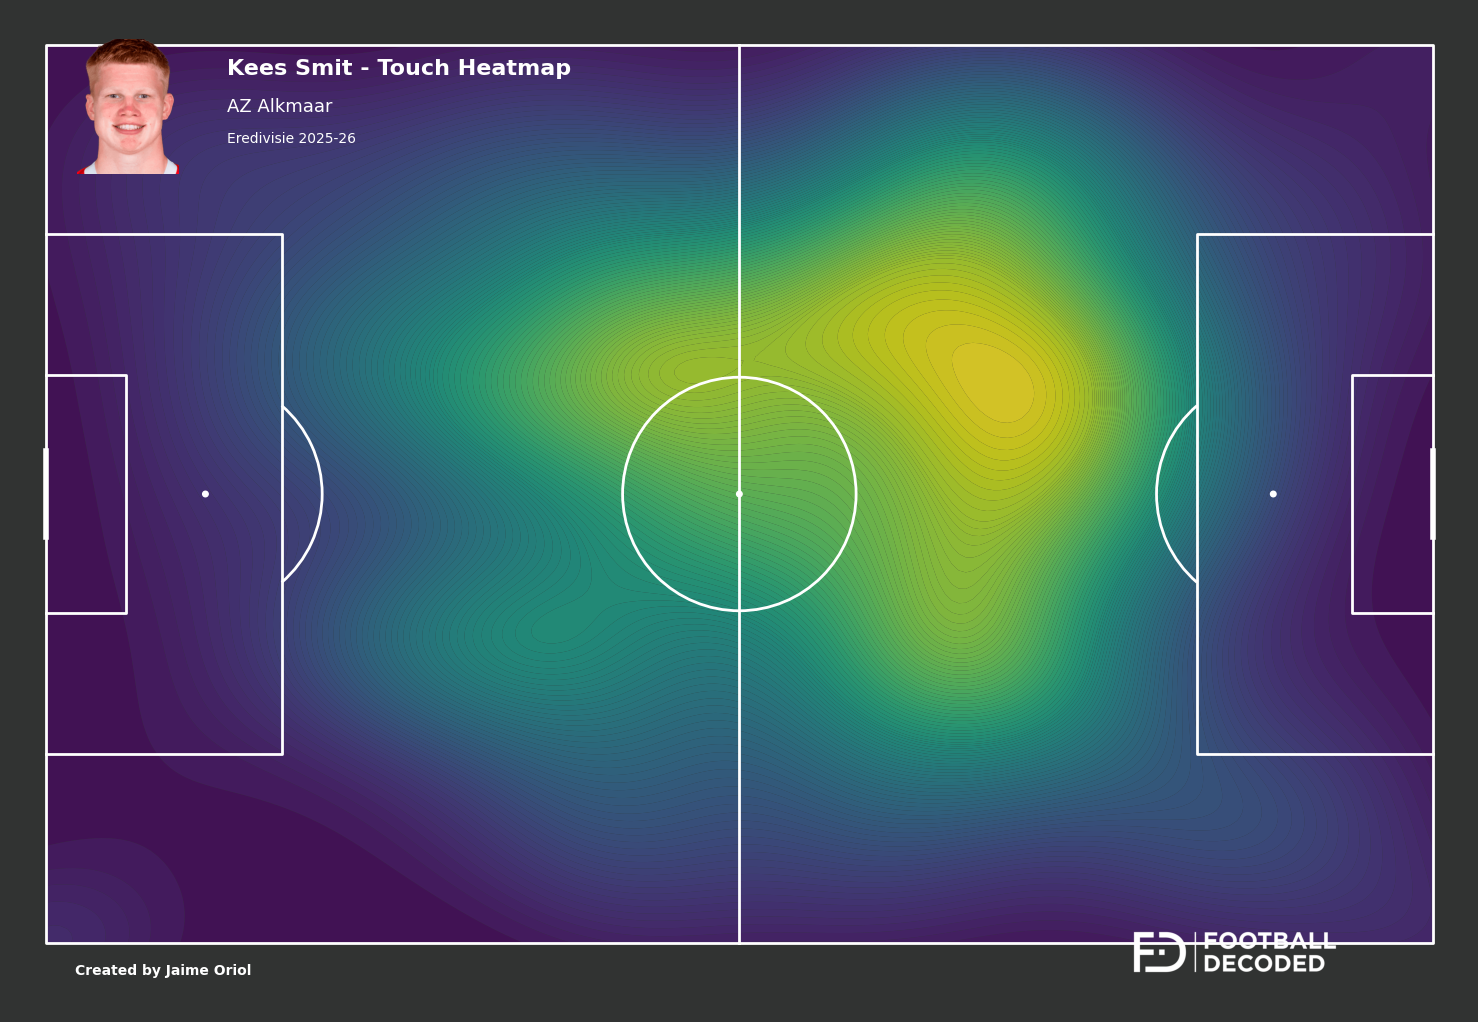

In [3]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
import os
from PIL import Image

BACKGROUND_COLOR = '#313332'
font = 'DejaVu Sans'

# Create output directory if it doesn't exist
os.makedirs('../images/smit_heatmaps', exist_ok=True)

if len(all_smit_events) > 0:
    df_valid = df_all_events[
        (df_all_events['x'].notna()) & 
        (df_all_events['y'].notna())
    ].copy()
    
    print(f"Eventos con coordenadas válidas: {len(df_valid)}")
    
    # Pitch HORIZONTAL
    pitch = Pitch(
        pitch_color=BACKGROUND_COLOR,
        line_color='white',
        linewidth=2,
        pitch_type='opta'
    )
    
    fig, ax = pitch.draw(figsize=(16, 10))
    
    pitch.kdeplot(
        df_valid['x'],
        df_valid['y'],
        fill=True,
        levels=100,
        shade_lowest=True,
        cmap='viridis',
        cut=4,
        alpha=0.8,
        antialiased=True,
        zorder=0,
        ax=ax
    )
    
    fig.set_facecolor(BACKGROUND_COLOR)
    fig.patch.set_facecolor(BACKGROUND_COLOR)
    
    # Títulos estilo shot_xg
    fig.text(0.18, 0.92, "Kees Smit - Touch Heatmap", fontweight="bold", fontsize=16, color='w', fontfamily=font)
    fig.text(0.18, 0.883, "AZ Alkmaar", fontweight="regular", fontsize=13, color='w', fontfamily=font)
    fig.text(0.18, 0.852, "Eredivisie 2025-26", fontweight="regular", fontsize=10, color='w', fontfamily=font)
    
    # Cara del jugador (esquina superior izquierda)
    try:
        face_path = "../caras/extras/Smit.png"
        if os.path.exists(face_path):
            ax_face = fig.add_axes([0.05, 0.82, 0.135, 0.135])
            ax_face.axis("off")
            face_img = Image.open(face_path)
            ax_face.imshow(face_img)
    except:
        pass
    
    # Footer: Created by Jaime Oriol
    fig.text(0.085, 0.02, "Created by Jaime Oriol", fontweight='bold', fontsize=10, 
             color="white", fontfamily=font)
    
    # Logo Football Decoded (esquina inferior derecha)
    try:
        logo_path = "../logo/Logo-blanco.png"
        if os.path.exists(logo_path):
            logo_img = Image.open(logo_path)
            logo_ax = fig.add_axes([0.67, -0.018, 0.28, 0.12])
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')
    except:
        pass
    
    output_path = '../images/smit_heatmaps/smit_all_actions_heatmap.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=BACKGROUND_COLOR)
    print(f"\nGuardado: {output_path}")
    
    plt.show()
else:
    print("Sin eventos de Kees Smit")

Total pases con coordenadas válidas: 523

Guardado: ../images/smit_heatmaps/smit_all_passes_map.png


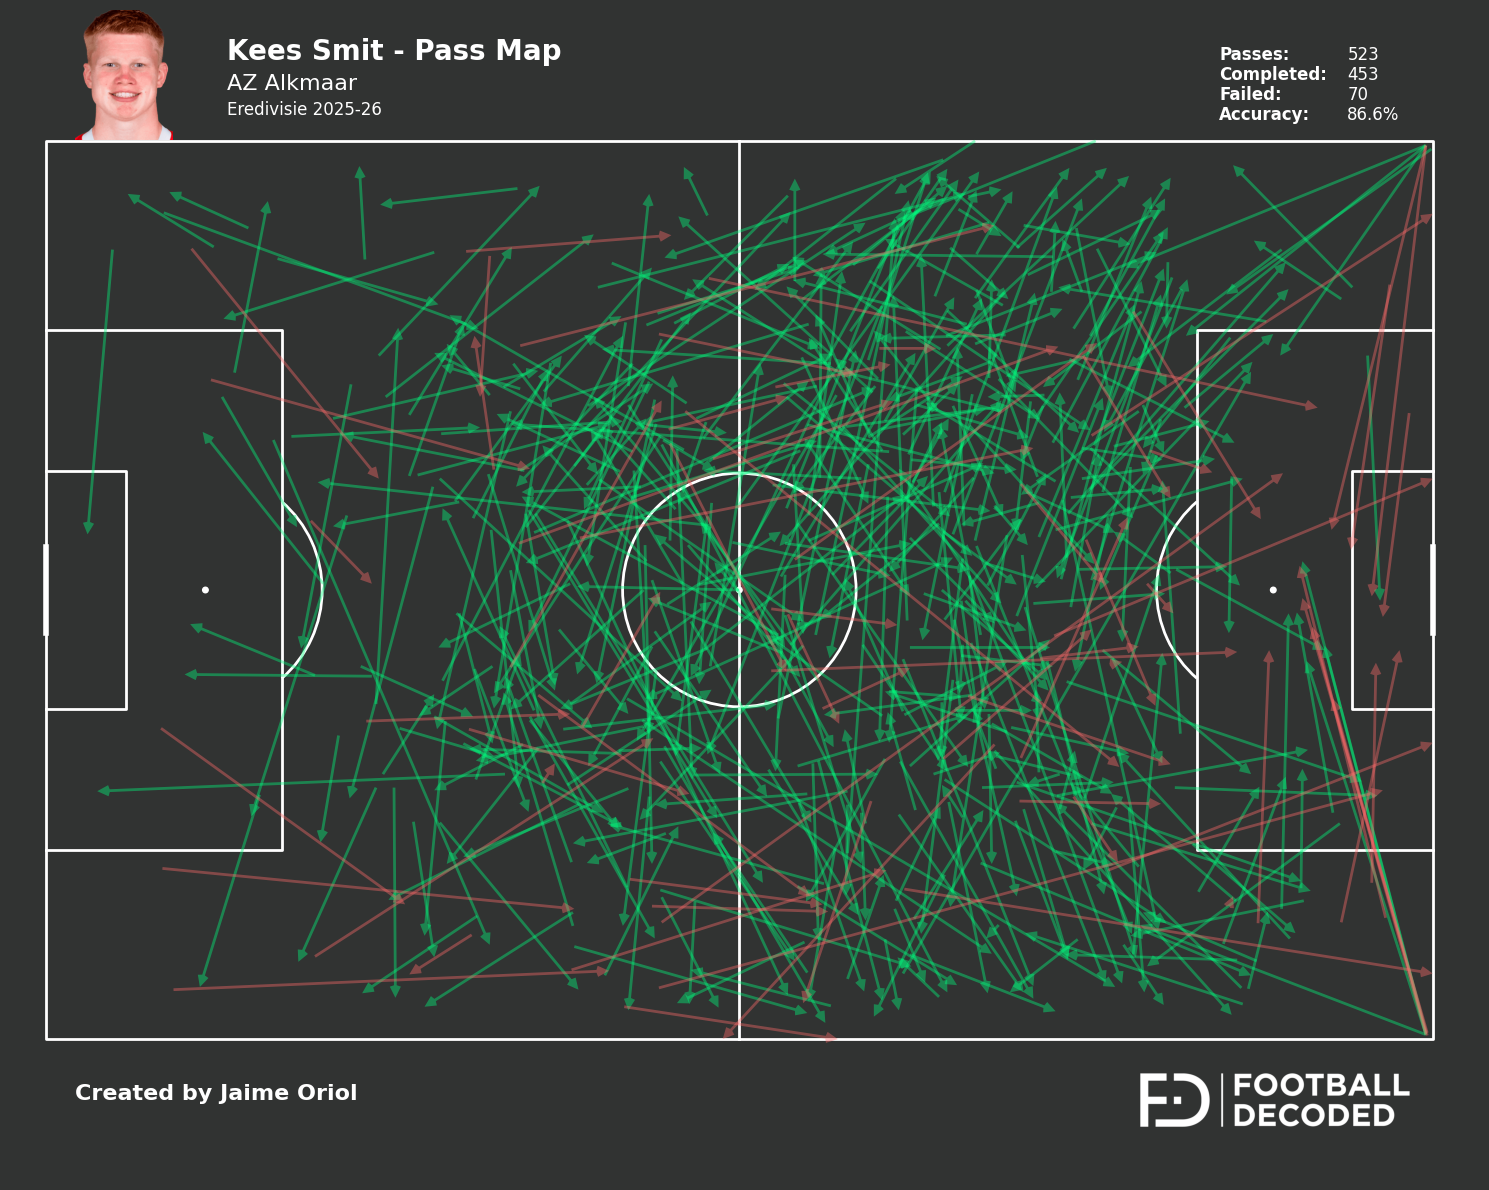

In [26]:
if len(all_smit_events) > 0:
    df_passes = df_all_events[
        (df_all_events['type'] == 'Pass') &
        (df_all_events['x'].notna()) & 
        (df_all_events['y'].notna()) &
        (df_all_events['end_x'].notna()) & 
        (df_all_events['end_y'].notna())
    ].copy()
    
    print(f"Total pases con coordenadas válidas: {len(df_passes)}")
    
    # Pitch HORIZONTAL
    pitch = Pitch(
        pitch_color=BACKGROUND_COLOR,
        line_color='white',
        linewidth=2,
        pitch_type='opta'
    )
    
    fig, ax = pitch.draw(figsize=(16, 10))
    
    # Pases completados (verde)
    successful_passes = df_passes[df_passes['outcome_type'] == 'Successful']
    pitch.arrows(
        successful_passes['x'], 
        successful_passes['y'],
        successful_passes['end_x'], 
        successful_passes['end_y'],
        color='#00FF7F',
        alpha=0.4,
        width=2,
        headwidth=4,
        headlength=4,
        ax=ax,
        zorder=1
    )
    
    # Pases fallados (rojo)
    failed_passes = df_passes[df_passes['outcome_type'] != 'Successful']
    pitch.arrows(
        failed_passes['x'], 
        failed_passes['y'],
        failed_passes['end_x'], 
        failed_passes['end_y'],
        color='#FF6B6B',
        alpha=0.4,
        width=2,
        headwidth=4,
        headlength=4,
        ax=ax,
        zorder=1
    )
    
    fig.set_facecolor(BACKGROUND_COLOR)
    fig.patch.set_facecolor(BACKGROUND_COLOR)
    
    # Títulos estilo shot_xg
    fig.text(0.18, 1.03, "Kees Smit - Pass Map", fontweight="bold", fontsize=20, color='w', fontfamily=font)
    fig.text(0.18, 1, "AZ Alkmaar", fontweight="regular", fontsize=16, color='w', fontfamily=font)
    fig.text(0.18, 0.975, "Eredivisie 2025-26", fontweight="regular", fontsize=12, color='w', fontfamily=font)
    
    # Stats en la esquina superior derecha
    total_passes = len(df_passes)
    completion_rate = len(successful_passes) / total_passes * 100 if total_passes > 0 else 0
    
    fig.text(0.8, 1.03, "Passes:", fontweight="bold", fontsize=12, color='w', fontfamily=font)
    fig.text(0.88, 1.03, f"{total_passes}", fontweight="regular", fontsize=12, color='w', fontfamily=font)
    
    fig.text(0.8, 1.01, "Completed:", fontweight="bold", fontsize=12, color='w', fontfamily=font)
    fig.text(0.88, 1.01, f"{len(successful_passes)}", fontweight="regular", fontsize=12, color='w', fontfamily=font)
    
    fig.text(0.8, 0.99, "Failed:", fontweight="bold", fontsize=12, color='w', fontfamily=font)
    fig.text(0.88, 0.99, f"{len(failed_passes)}", fontweight="regular", fontsize=12, color='w', fontfamily=font)
    
    fig.text(0.8, 0.97, "Accuracy:", fontweight="bold", fontsize=12, color='w', fontfamily=font)
    fig.text(0.88, 0.97, f"{completion_rate:.1f}%", fontweight="regular", fontsize=12, color='w', fontfamily=font)
    
    # Cara del jugador (esquina superior izquierda)
    try:
        face_path = "../caras/extras/Smit.png"
        if os.path.exists(face_path):
            ax_face = fig.add_axes([0.05, 0.95, 0.13, 0.13])
            ax_face.axis("off")
            face_img = Image.open(face_path)
            ax_face.imshow(face_img)
    except:
        pass
    
    # Footer: Created by Jaime Oriol
    fig.text(0.085, -0.01, "Created by Jaime Oriol", fontweight='bold', fontsize=16, 
             color="white", fontfamily=font)
    
    # Logo Football Decoded (esquina inferior derecha)
    try:
        logo_path = "../logo/Logo-blanco.png"
        if os.path.exists(logo_path):
            logo_img = Image.open(logo_path)
            logo_ax = fig.add_axes([0.675, -0.09, 0.32, 0.16])
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')
    except:
        pass
    
    output_path = '../images/smit_heatmaps/smit_all_passes_map.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=BACKGROUND_COLOR)
    print(f"\nGuardado: {output_path}")
    
    plt.show()
else:
    print("Sin eventos de Kees Smit")